In [1]:
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [4]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station VARCHAR(255)
date VARCHAR(255)
prcp FLOAT
tobs INTEGER


In [5]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-06', 0.0, 73)]

In [6]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [7]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [8]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
session = Session(engine)

In [10]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7f8334dfc470>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65,
 'date': '2010-01-01',
 'id': 1}

In [11]:
results = session.query(Measurement.station).all()
results[:5]

[('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397'),
 ('USC00519397')]

In [12]:
one_year = timedelta(days=365)
one_year_prcp=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > (datetime.datetime.today()-one_year)).all()

In [16]:
prcp_df=pd.DataFrame(one_year_prcp)
prcp_df.head()

,date,prcp
0,2017-05-27,0.01
1,2017-05-28,0.02
2,2017-05-29,0.00
3,2017-05-30,0.26
4,2017-05-31,0.02


In [17]:
prcp_df.columns

Index(['date', 'prcp'], dtype='object')

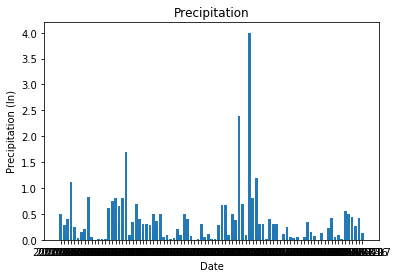

In [18]:
#Plot the prcp data against date
### BEGIN SOLUTION

x_axis = prcp_df['date']
y_axis = prcp_df['prcp']
 
plt.bar(x_axis, y_axis, align='center', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Precipitation (In)')
plt.title('Precipitation')
 
plt.show()

In [ ]:
prcp_df.describe()